In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf 
from tensorflow.keras.models import load_model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv("forestfires (2).csv")

In [4]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
data = data.drop(['month','day'],axis = 1)

In [6]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
mapping = { 'small': 1, 'large': 2}

In [8]:
mapping

{'small': 1, 'large': 2}

In [9]:
data= data.replace(mapping)

In [10]:
data 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,2
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,2
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,2
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

In [12]:
x 

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [13]:
y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,

In [14]:
def norm_fun(i):
    x = ( i- i.min())/(i.max()-i.min())
    return (x)

In [15]:
n_norm = norm_fun(x)

In [16]:
n_norm

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

In [17]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [18]:
x_train,x_test, y_train, y_test

(array([[ 91.4, 142.4, 601.4, ...,   0. ,   0. ,   0. ],
        [ 92.3,  88.8, 440.9, ...,   0. ,   0. ,   0. ],
        [ 90.1,  82.9, 735.7, ...,   0. ,   0. ,   1. ],
        ...,
        [ 88.6,  91.8, 709.9, ...,   0. ,   0. ,   1. ],
        [ 91.7,  35.8,  80.8, ...,   0. ,   0. ,   0. ],
        [ 93.5, 149.3, 728.6, ...,   0. ,   0. ,   1. ]]),
 array([[ 94.2, 122.3, 589.9, ...,   0. ,   0. ,   0. ],
        [ 89.7, 284.9, 844. , ...,   0. ,   0. ,   1. ],
        [ 94.3, 131.7, 607.1, ...,   0. ,   0. ,   0. ],
        ...,
        [ 91. , 129.5, 692.6, ...,   0. ,   0. ,   1. ],
        [ 91.6, 108.4, 764. , ...,   0. ,   0. ,   1. ],
        [ 91.6, 181.3, 613. , ...,   0. ,   0. ,   0. ]]),
 array([1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
        2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
        2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=28,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(x_train , y_train, validation_split=0.3, epochs=50, batch_size=10)

Epoch 1/50
29/29 [==============================] - 3s 17ms/step - loss: 54.1233 - accuracy: 0.0588 - val_loss: 23.2324 - val_accuracy: 0.1613
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 7.4408 - accuracy: 0.3495 - val_loss: -3.2087 - val_accuracy: 0.7984
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: -7.6180 - accuracy: 0.6955 - val_loss: -7.1858 - val_accuracy: 0.7984
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: -18.7675 - accuracy: 0.6955 - val_loss: -22.1939 - val_accuracy: 0.7984
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: -54.8485 - accuracy: 0.6955 - val_loss: -48.8510 - val_accuracy: 0.7984
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: -106.8342 - accuracy: 0.6955 - val_loss: -90.7374 - val_accuracy: 0.7984
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: -189.0498 - accuracy: 0.6955 - val_loss: -157.6765 - val_accuracy: 0.

In [22]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [23]:
scores = model.evaluate(x_train , y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 2ms/step - loss: -131908.9375 - accuracy: 0.7264
accuracy: 72.64%


In [24]:
scores = model.evaluate(x_test , y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: -109970.8281 - accuracy: 0.7500
accuracy: 75.00%


In [27]:
scores

[-109970.828125, 0.75]

In [25]:
model.history.history.keys()

dict_keys([])

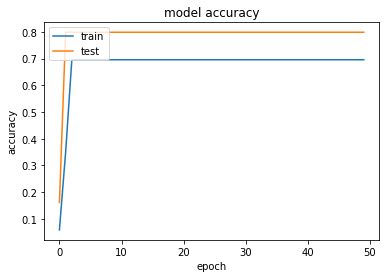

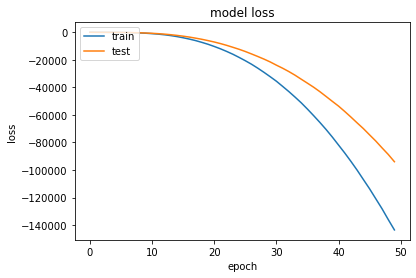

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()